# PCA and Perceptual Maps

In [2]:

import pandas as pd
#Import data
df = pd.read_csv("../2022-MMA831-Python/data/car_data.csv")
df.head()

,Car,Environmentally friendly,Reliable,Practical,Family Oriented,Good price-quality ratio,Luxurious,Safe,Sporty,Attractive,Comfortable,Powerful,Status symbol,Value for the money,High trade-in value,Workmanship
0,Volkswagen Golf,20,58,44,12,30,12,40,29,33,27,20,23,24,41,14
1,Opel Corsa,16,25,43,8,43,1,19,8,9,11,0,3,29,2,3
2,Nissan Qashgai,5,18,25,39,20,21,23,26,24,34,28,11,12,3,10
3,Toyota Prius,51,27,16,39,21,11,19,8,10,23,9,16,10,4,19
4,BMW X5,2,38,23,41,7,58,40,47,36,46,57,51,8,36,28


In [4]:
from sklearn import preprocessing
df_s = df.drop(columns = ['Car'])
df_s = pd.DataFrame(preprocessing.normalize(df_s), columns=df_s.columns)
df_s = df_s.join(df['Car'])
df_s.head()

,Environmentally friendly,Reliable,Practical,Family Oriented,Good price-quality ratio,Luxurious,Safe,Sporty,Attractive,Comfortable,Powerful,Status symbol,Value for the money,High trade-in value,Workmanship,Car
0,0.165925,0.481183,0.365035,0.099555,0.248888,0.099555,0.331850,0.240591,0.273776,0.223999,0.165925,0.190814,0.199110,0.340146,0.116148,Volkswagen Golf
1,0.204290,0.319204,0.549031,0.102145,0.549031,0.012768,0.242595,0.102145,0.114913,0.140450,0.000000,0.038304,0.370276,0.025536,0.038304,Opel Corsa
2,0.058002,0.208809,0.290012,0.452419,0.232010,0.243610,0.266811,0.301613,0.278412,0.394417,0.324814,0.127605,0.139206,0.034801,0.116005,Nissan Qashgai
3,0.587450,0.311003,0.184298,0.449226,0.241891,0.126705,0.218854,0.092149,0.115186,0.264928,0.103668,0.184298,0.115186,0.046075,0.218854,Toyota Prius
4,0.013397,0.254547,0.154068,0.274643,0.046890,0.388519,0.267944,0.314834,0.241150,0.308136,0.381820,0.341629,0.053589,0.241150,0.187561,BMW X5


### Heat map

In [8]:
import seaborn as sns
import numpy as np
import scipy
import scipy.cluster.hierarchy as sch

df_m = df.groupby(['Car']).mean()
df_m.head()

,Environmentally friendly,Reliable,Practical,Family Oriented,Good price-quality ratio,Luxurious,Safe,Sporty,Attractive,Comfortable,Powerful,Status symbol,Value for the money,High trade-in value,Workmanship
Car,,,,,,,,,,,,,,,
Audi A4,10.0,57.0,33.0,28.0,16.0,56.0,50.0,43.0,49.0,53.0,47.0,43.0,16.0,37.0,26.0
BMW X5,2.0,38.0,23.0,41.0,7.0,58.0,40.0,47.0,36.0,46.0,57.0,51.0,8.0,36.0,28.0
Citroen C4 Picasso,12.0,17.0,47.0,72.0,29.0,5.0,17.0,1.0,13.0,42.0,5.0,3.0,15.0,1.0,3.0
Fiat 500,32.0,11.0,39.0,3.0,20.0,6.0,5.0,8.0,40.0,6.0,1.0,12.0,7.0,3.0,3.0
Ford Focus Cmax,6.0,33.0,49.0,56.0,25.0,7.0,25.0,8.0,12.0,32.0,10.0,2.0,15.0,2.0,1.0


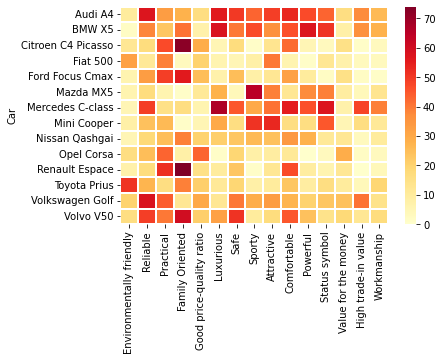

In [9]:
ax = sns.heatmap(df_m,  cmap="YlOrRd",linewidths=0.4)

### PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_s = df.drop(columns = ['Car'])
df_s = pd.DataFrame(preprocessing.normalize(df_s), columns=df_s.columns)
df_s = df_s.join(df['Car'])
X = df_s.drop(columns = ['Car'])
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf.head()

,PC1,PC2
0,0.091734,0.156869
1,-0.332498,0.448736
2,-0.029506,-0.192866
3,-0.217761,0.057139
4,0.342356,-0.285358


,PC1,PC2,Car
0,0.091734,0.156869,Volkswagen Golf
1,-0.332498,0.448736,Opel Corsa
2,-0.029506,-0.192866,Nissan Qashgai
3,-0.217761,0.057139,Toyota Prius
4,0.342356,-0.285358,BMW X5


In [12]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.49278736, 0.23549851, 0.09988995, 0.07943662, 0.04773477,
       0.01624812, 0.01432763, 0.00715009, 0.00333829])

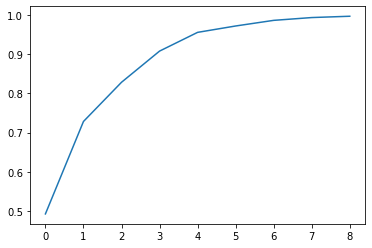

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## PCA

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components = 2)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value


df_s = df.drop(columns = ['Car'])
df_s = pd.DataFrame(preprocessing.normalize(df_s), columns=df_s.columns)
df_s = df_s.join(df['Car'])
df_s['Car']= label_encoder.fit_transform(df_s['Car']) #Label encoding for the YellowBricks functions to work

X = df_s.drop(columns = ['Car'])
y = df_s['Car']


pca.fit(X)


PCA(n_components=2)

## Bi plot

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


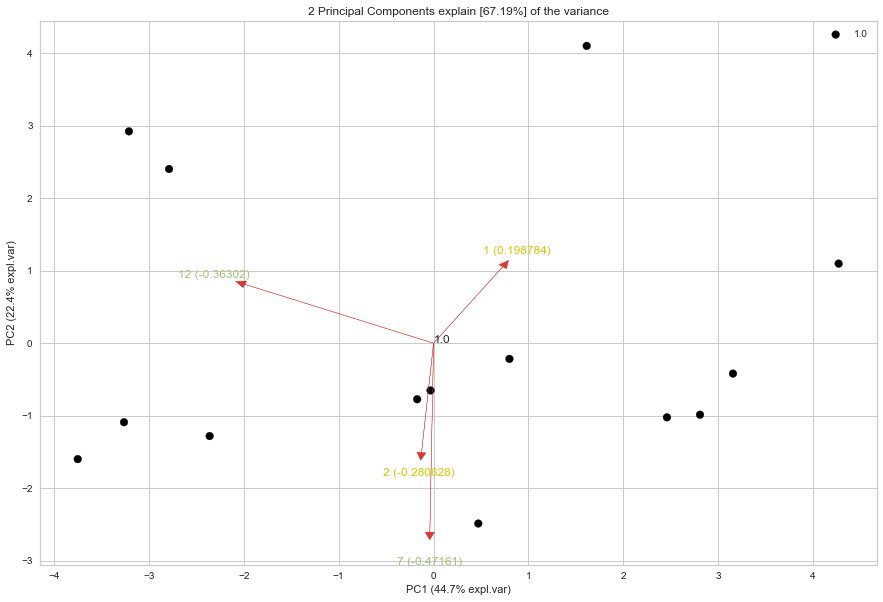

In [23]:
from pca import pca

model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X)

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)


### Basic byplot, limit number of arrows/features shown

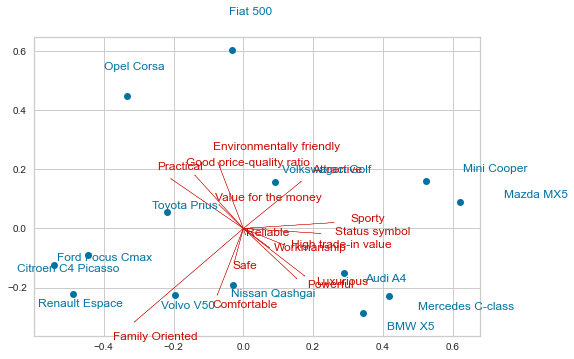

In [35]:

## project data into PC space
dat=X
# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, df['Car'][i], color='b')

plt.show()